Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

In [50]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
pip install --upgrade threadpoolctl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
Crime=pd.read_csv('crime_data.csv')

In [4]:
Crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


EDA

In [5]:
Crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
Crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [7]:
Crime.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [8]:
Crime.shape

(50, 5)

In [9]:
Crime.size

250

In [10]:
Crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [11]:
#There are no null values in data set

In [12]:
Crime.duplicated().sum()

0

In [13]:
#Data Preparation

In [14]:
Crime.rename(columns={"Unnamed: 0":"states"}, inplace=True)

In [15]:
Crime.head()

,states,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


<AxesSubplot:ylabel='Frequency'>

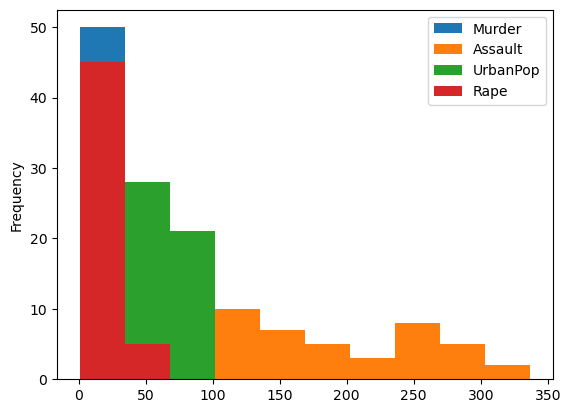

In [16]:
Crime.plot.hist()

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scalar = MinMaxScaler()
scalar=scalar.fit_transform(Crime.iloc[:,1:])

In [19]:
data = pd.DataFrame(scalar,columns=['Murder','Assault','UrbanPop','Rape'])
data.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


# Hierarchical Clustering

In [20]:
import scipy.cluster.hierarchy as sch

In [21]:
#single linkage

Text(0.5, 1.0, 'Single Linkage Dendogram')

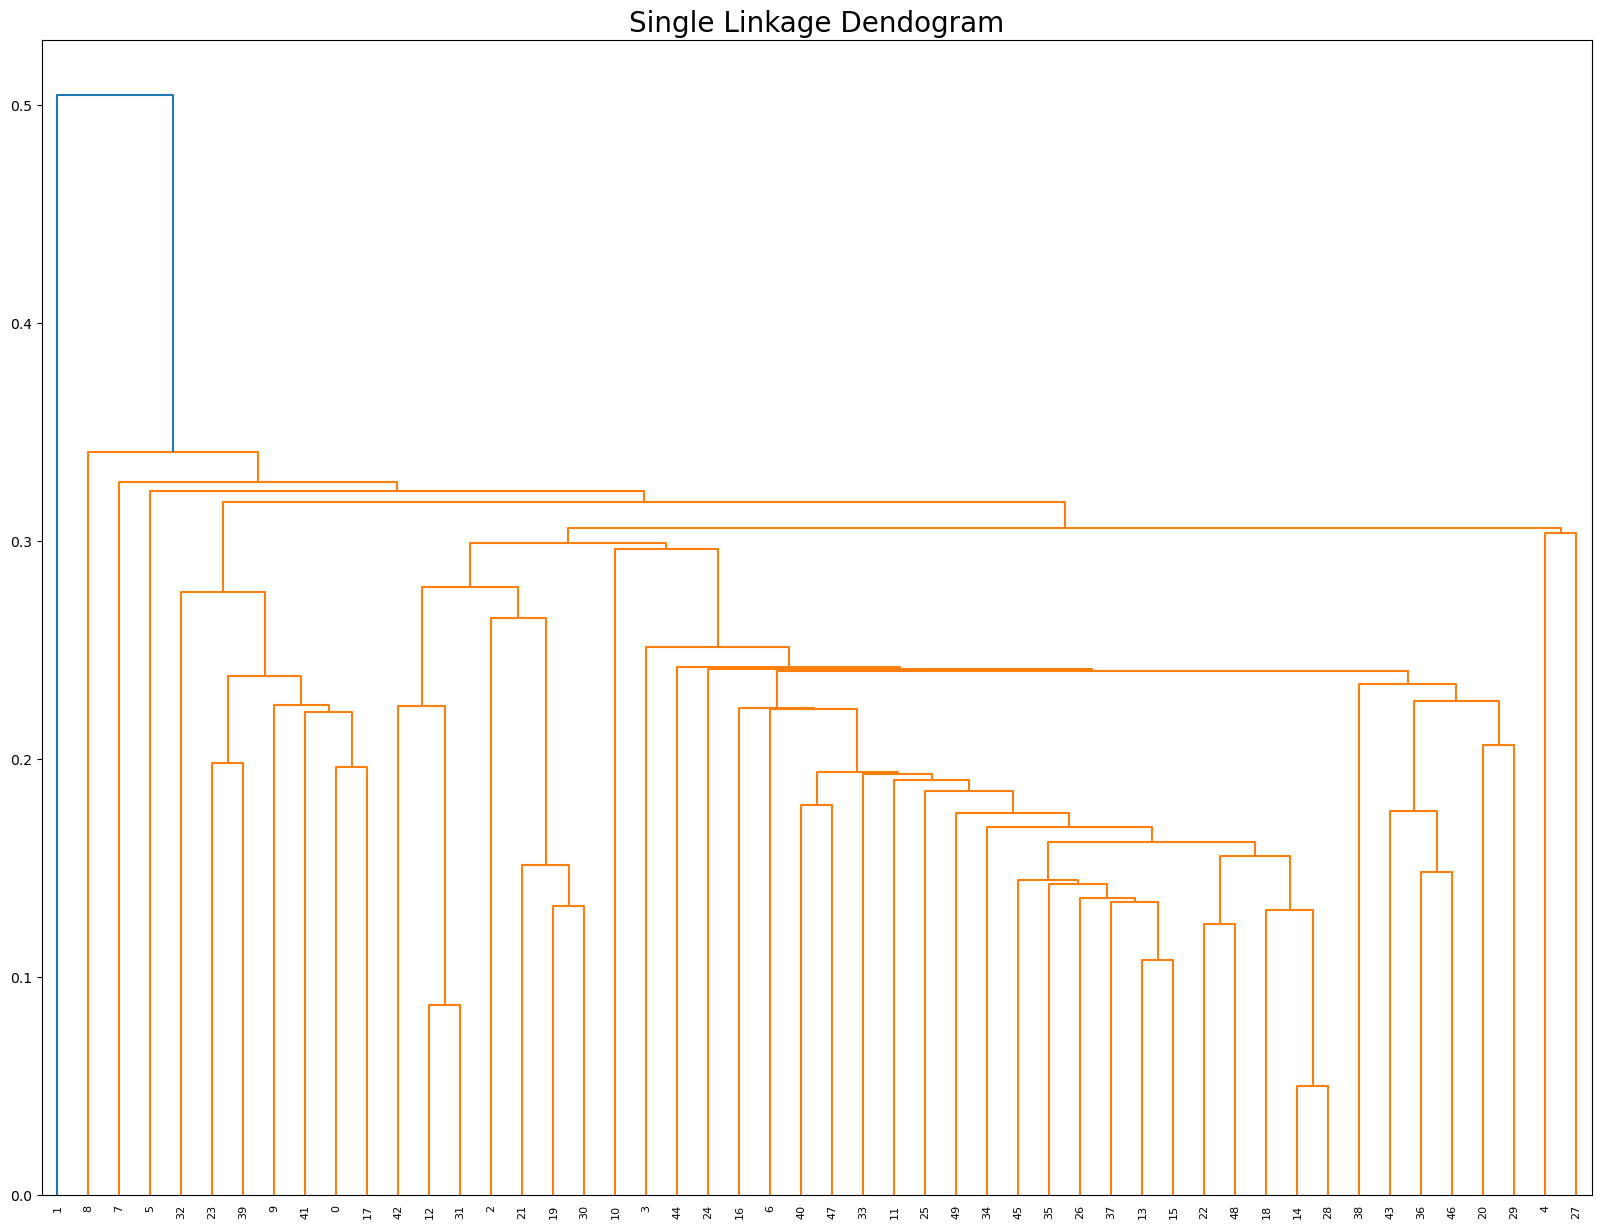

In [22]:
#Dentogram
fig=plt.figure(figsize = (20,15))
dendogram=sch.dendrogram(sch.linkage(data,method='single'))
plt.title('Single Linkage Dendogram',size=20)

In [23]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
hie_1=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='single')

In [25]:
pred_1=hie_1.fit_predict(data)

In [26]:
Crime['Cluster']=pred_1
Crime.head()

,states,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [27]:
Crime['Cluster'].value_counts()

0    47
3     1
1     1
2     1
Name: Cluster, dtype: int64

In [28]:
#Complete Linkage

Text(0.5, 1.0, 'Complete Linkage Dendogram')

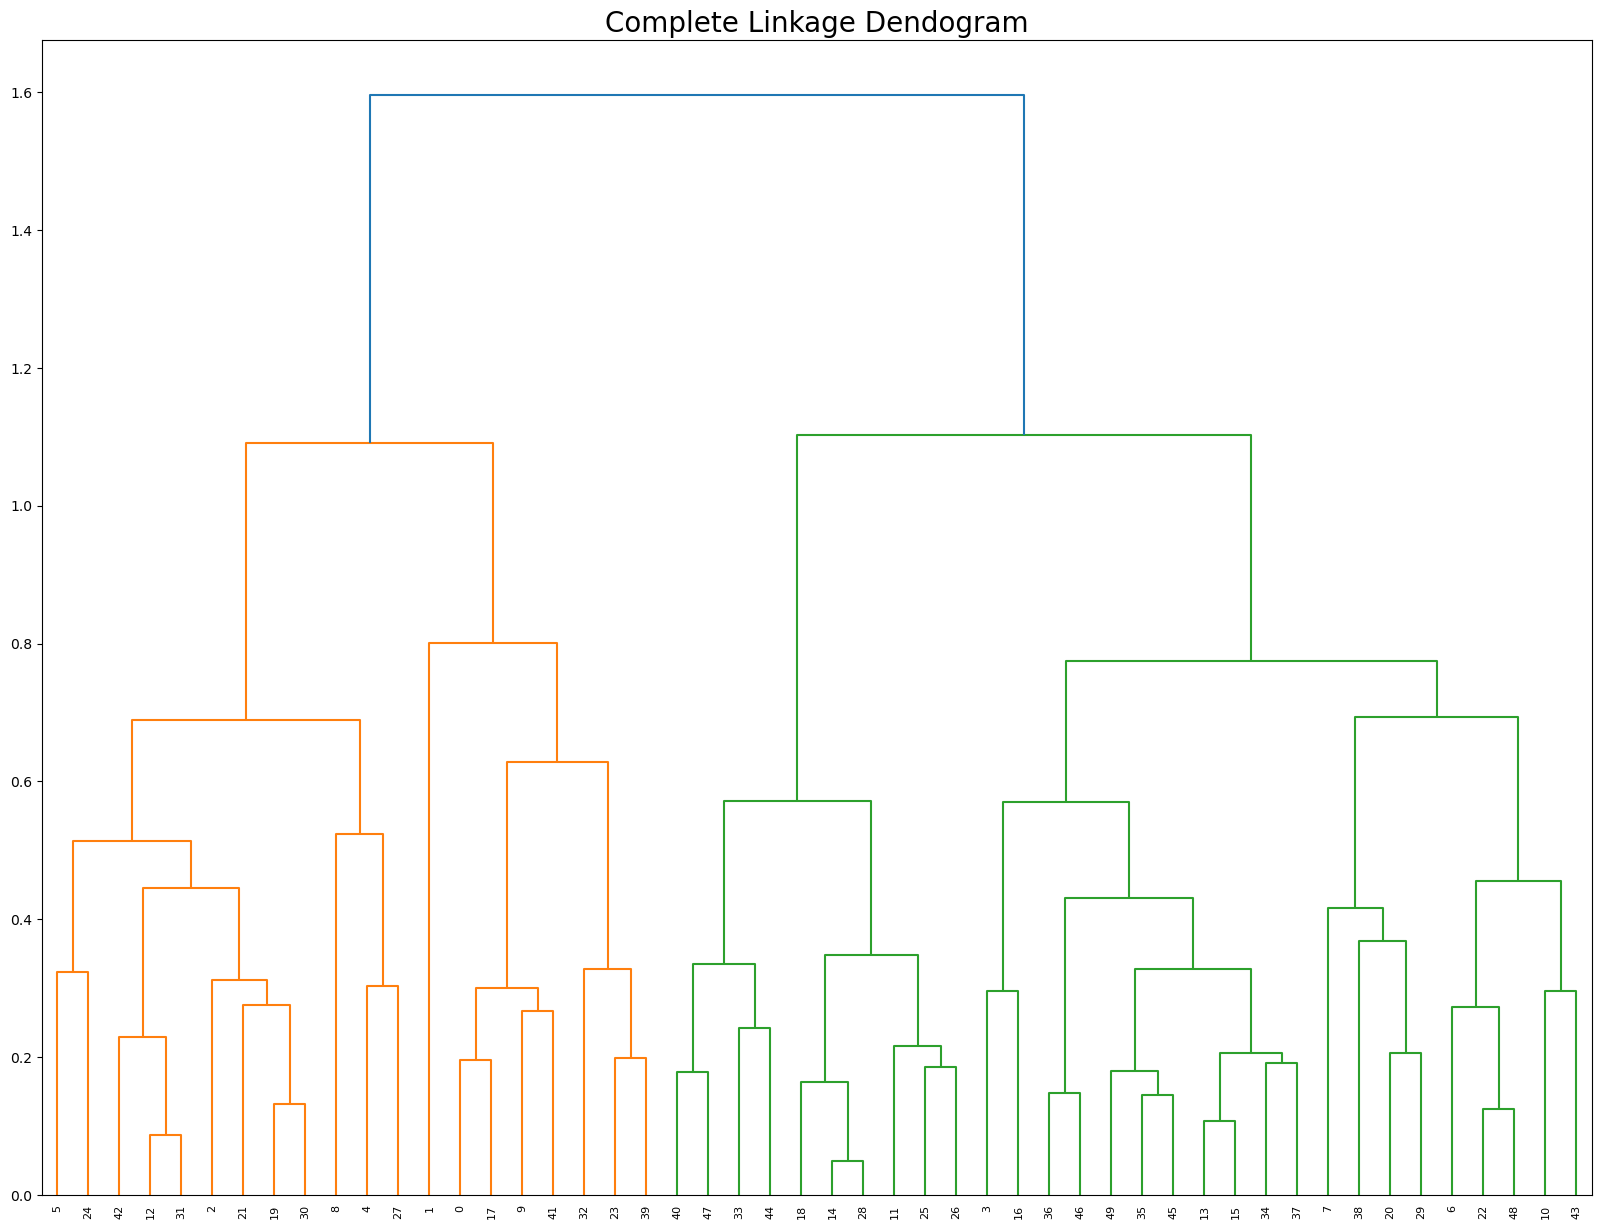

In [29]:
fig=plt.figure(figsize=(20,15))
dendogram=sch.dendrogram(sch.linkage(data,method='complete'))
plt.title('Complete Linkage Dendogram',size=20)

In [30]:
hie_2=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete')

In [31]:
pred_2=hie_2.fit_predict(data)

In [32]:
Crime['Cluster']=pred_2
Crime.head()

,states,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3


In [33]:
Crime['Cluster'].value_counts()

1    20
3    12
2    10
0     8
Name: Cluster, dtype: int64

In [34]:
#Average Linkage

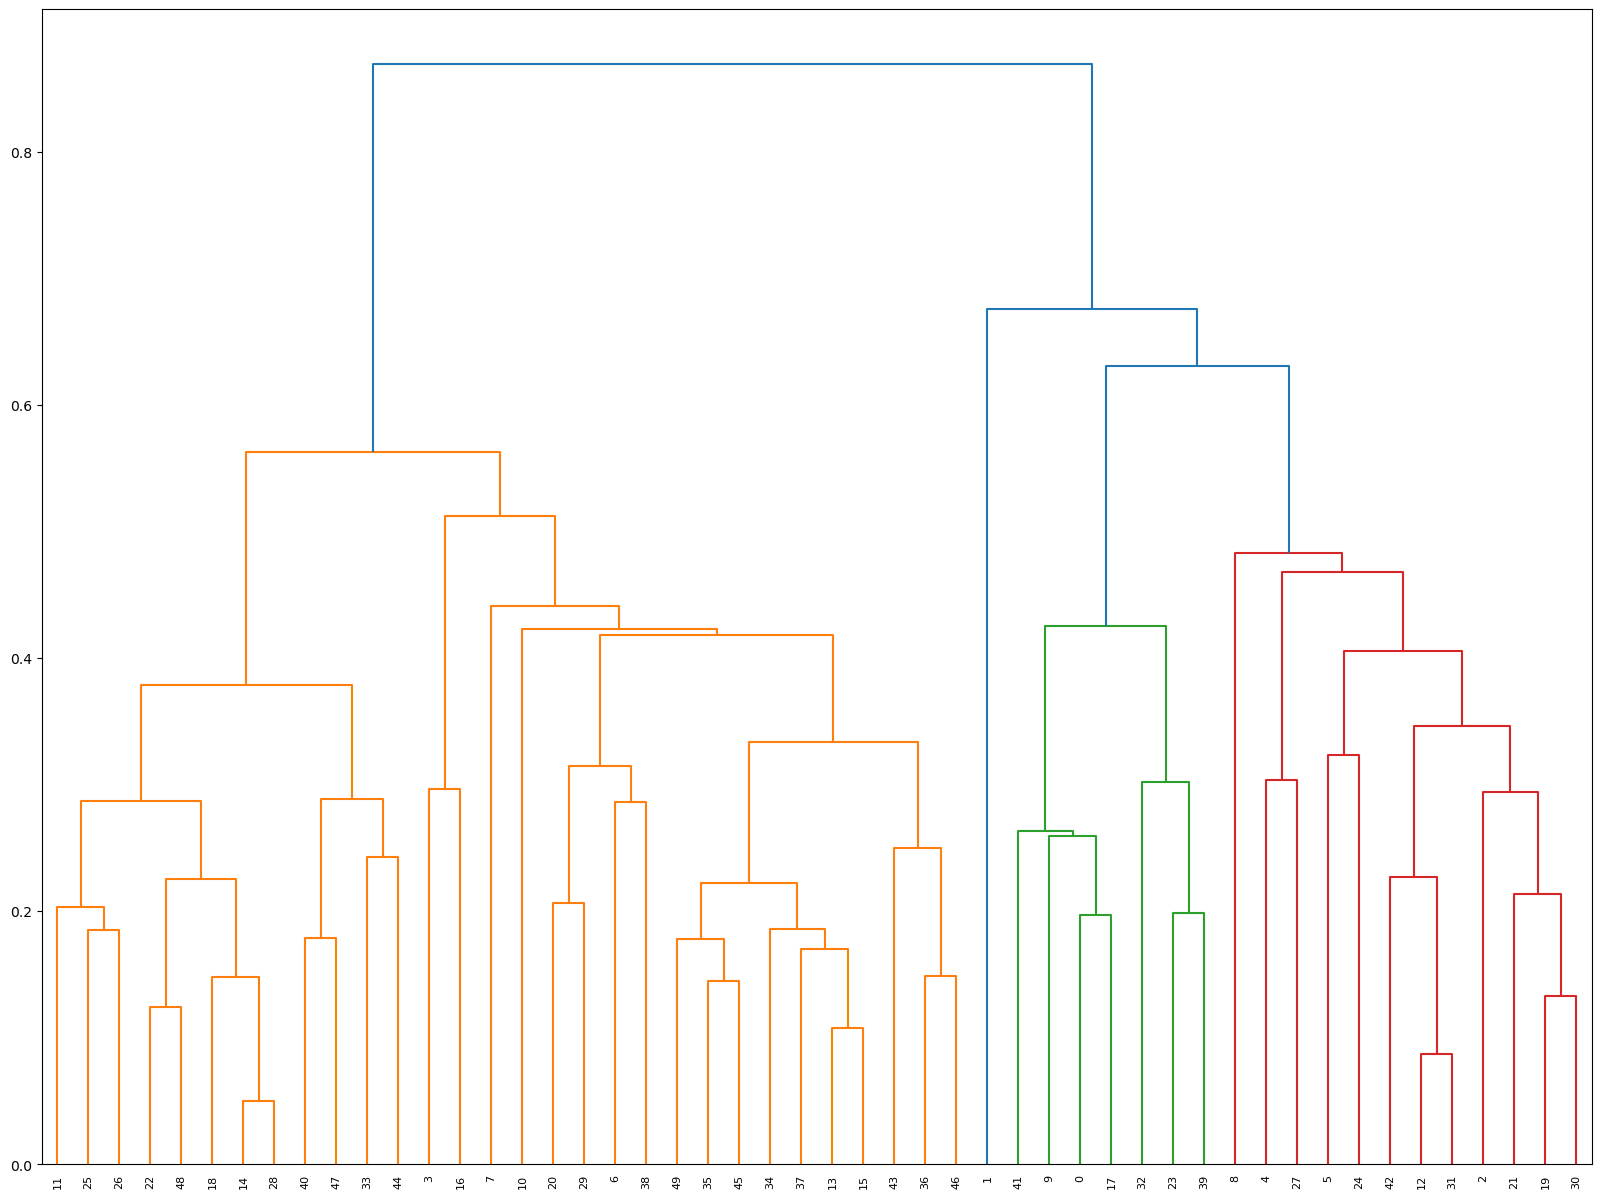

<Figure size 2000x1500 with 0 Axes>

In [35]:
fig=plt.figure(figsize = (20,15))
dendogram=sch.dendrogram(sch.linkage(data,method='average'))
fig=plt.figure(figsize = (20,15))

In [36]:
hie_3=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')

In [37]:
pred_3=hie_3.fit_predict(data)

In [38]:
Crime['Cluster']=pred_3
Crime.head()

,states,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [39]:
Crime['Cluster'].value_counts()

0    30
1    12
3     7
2     1
Name: Cluster, dtype: int64

# K-Means Clustering

In [40]:
from sklearn.cluster import KMeans

In [41]:
Crime1=pd.read_csv('crime_data.csv')

In [42]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [43]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler1=StandardScaler()
scaled_Crime_df=scaler1.fit_transform(Crime.iloc[:,1:])

In [44]:
scaled_Crime_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  2.20300046],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  1.24517417],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  0.28734789],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.6704784 ],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  0.28734789],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  0.28734789],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.6704784 ],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.6704784 ],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  0.28734789],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  2.20300046],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -0.6704784 ],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217, -0.6704784 ],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  0.28734789],
       [-0.13637203, -0.70012057, -0.0

In [52]:
range(1,11)

range(1, 11)

In [55]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=12)
    kmeans.fit(scalar)
    wcss.append(kmeans.inertia_)

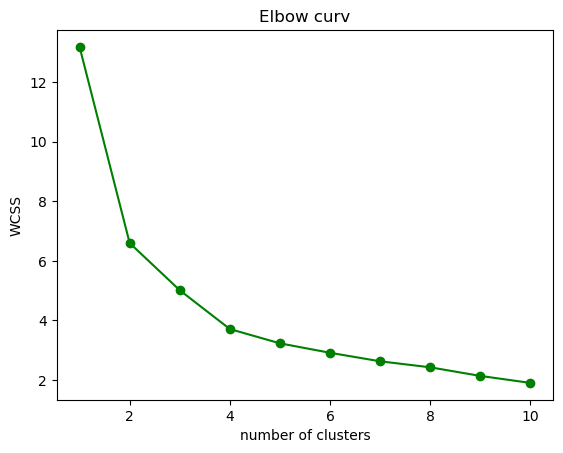

In [56]:
plt.plot(range(1,11),wcss,'bo-',color='g')
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [58]:
kmeans_cluster = KMeans(4, random_state = 42)
kmeans_cluster.fit(data)

KMeans(n_clusters=4, random_state=42)

In [59]:
y_pred_k=kmeans_cluster.fit_predict(data)

In [61]:
Crime['Cluster'] = y_pred_k
Crime.head()

,states,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,3


In [62]:
Crime['Cluster'].value_counts()

0    16
3    13
1    13
2     8
Name: Cluster, dtype: int64

# DBSCAN Clustering

In [64]:
from sklearn.cluster import DBSCAN

In [65]:
dbscan=DBSCAN(eps = 0.3, min_samples = 3)
dbscan.fit(data)

DBSCAN(eps=0.3, min_samples=3)

In [66]:
pred_db=dbscan.fit_predict(data)

In [67]:
Crime['Cluster_DBSCAN']=pred_db
Crime.head()

,states,Murder,Assault,UrbanPop,Rape,Cluster,Cluster_DBSCAN
0,Alabama,13.2,236,58,21.2,2,0
1,Alaska,10.0,263,48,44.5,3,-1
2,Arizona,8.1,294,80,31.0,3,1
3,Arkansas,8.8,190,50,19.5,2,1
4,California,9.0,276,91,40.6,3,-1


In [68]:
#Silhouette Score

In [70]:
from sklearn import metrics

In [72]:
silhouette_SLM=(metrics.silhouette_score(data,pred_1))
silhouette_SLM

-0.1674119195474404

In [73]:
silhouette_CLM=(metrics.silhouette_score(data,pred_2))
silhouette_CLM

0.3060729442426308

In [74]:
silhouette_ALM=(metrics.silhouette_score(data,pred_3))
silhouette_ALM

0.36992391140277175

In [76]:
silhouette_KMeans=(metrics.silhouette_score(data,y_pred_k))
silhouette_KMeans

0.3349095719865253

In [77]:
silhouette_DBSCAN=(metrics.silhouette_score(data,pred_db))
silhouette_DBSCAN

0.2473858809927262

In [78]:
table = {'Clustering Models' : ['HC Single Linkage', 'HC Complete Linkage', 'HC Average Linkage', 
         'KMeans', 'DBSCAN'], 
          'Silhouette Score' : [silhouette_SLM, silhouette_CLM, silhouette_ALM, 
                                silhouette_KMeans, silhouette_DBSCAN]
        }

In [79]:
table=pd.DataFrame(table)
table

,Clustering Models,Silhouette Score
0,HC Single Linkage,-0.167412
1,HC Complete Linkage,0.306073
2,HC Average Linkage,0.369924
3,KMeans,0.334910
4,DBSCAN,0.247386


In [80]:
#Average linkage is giving better result compared to other hierarchical clustering.

In [81]:
#KMeans clustering gives good result.